In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import gc
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image
from sklearn import preprocessing
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten
from tensorflow.keras.applications import NASNetMobile, DenseNet121, ResNet50

In [ ]:
train_path = os.path.join('/content/drive/My Drive/ARU/MajorProject')

In [ ]:
neg_images = os.listdir(train_path);
post_images = os.listdir(train_path + '/Positive');
neg_images_one = os.listdir(train_path + '/Negative');

In [ ]:
WIDTH = 200
HEIGHT = 200
CHANNEL = 3

In [ ]:
neg_df_one = { 'id': neg_images_one}
neg_df_one = pd.DataFrame(neg_df_one)
neg_df_one['label'] = 0;
print(neg_df_one)

                    id  label
0    1646599778299.jpg      0
1    1646600323435.jpg      0
2    1646601843777.jpg      0
3    1646601843802.jpg      0
4    1646601843826.jpg      0
..                 ...    ...
177  1649850247430.jpg      0
178  1649850247449.jpg      0
179  1649850247466.jpg      0
180  1649850247484.jpg      0
181  1649850247502.jpg      0

[182 rows x 2 columns]


In [ ]:
neg_ids_one = neg_df_one['id']
neg_labels_one = np.array(neg_df_one['label'])
neg_labels_one[:5]

array([0, 0, 0, 0, 0])

In [ ]:
neg_ids_one

0      1646599778299.jpg
1      1646600323435.jpg
2      1646601843777.jpg
3      1646601843802.jpg
4      1646601843826.jpg
             ...        
177    1649850247430.jpg
178    1649850247449.jpg
179    1649850247466.jpg
180    1649850247484.jpg
181    1649850247502.jpg
Name: id, Length: 182, dtype: object

In [ ]:
NUM_ITEMS_NEG_ONE = len(neg_df_one)
NUM_ITEMS_NEG_ONE

182

In [ ]:
# Building data list
data_neg_one = []
for i in range(NUM_ITEMS_NEG_ONE):
    image = Image.open(train_path + '/Negative/' + neg_ids_one[i])
    # resize the image and convert into numpy array (200, 200)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    data_neg_one.append(image)
data_neg_one = np.array(data_neg_one)

In [ ]:
len(data_neg_one)

182

In [ ]:
neg_df = { 'id': neg_images}
neg_df = pd.DataFrame(neg_df)
neg_df = neg_df[neg_df.id != 'Positive'];
neg_df = neg_df[neg_df.id != 'Negative'];
neg_df['label'] = 0;
print(neg_df)

                    id  label
0    1645546849850.jpg      0
1    1645546849863.jpg      0
2    1645546849877.jpg      0
3    1645546849894.jpg      0
4    1645546849940.jpg      0
..                 ...    ...
363  1646397063718.jpg      0
364  1646397063730.jpg      0
365  1646397063740.jpg      0
366  1646397063452.jpg      0
367  1646397063677.jpg      0

[368 rows x 2 columns]


In [ ]:
neg_ids = neg_df['id']
neg_labels = np.array(neg_df['label'])
neg_labels[:5]

array([0, 0, 0, 0, 0])

In [ ]:
post_df = { 'id': post_images}
post_df = pd.DataFrame(post_df)
post_df['label'] = 1;
print(post_df)

                    id  label
0    1646476113867.jpg      1
1    1646476113873.jpg      1
2    1646476113881.jpg      1
3    1646476113889.jpg      1
4    1646476113899.jpg      1
..                 ...    ...
295  1650442223359.jpg      1
296  1650442223408.jpg      1
297  1650442223453.jpg      1
298  1650442223503.jpg      1
299  1650442223549.jpg      1

[300 rows x 2 columns]


In [ ]:
post_ids = post_df['id']
post_labels = np.array(post_df['label'])
post_labels[:5]

array([1, 1, 1, 1, 1])

In [ ]:
NUM_ITEMS_NEG = len(neg_df)
NUM_ITEMS_NEG

368

In [ ]:
# Building data list
data_neg = []

for i in range(NUM_ITEMS_NEG):
    image = Image.open(train_path + '/' + neg_ids[i])
    # resize the image and convert into numpy array (200, 200)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    data_neg.append(image)
data_neg = np.array(data_neg)

In [ ]:
len(data_neg)

368

In [ ]:
NUM_ITEMS_POST = len(post_df)
NUM_ITEMS_POST

300

In [ ]:
# Building positive data list
post_data = []
for i in range(NUM_ITEMS_POST):
    image = Image.open(train_path + '/Positive/' + post_ids[i])
    # resize the image and convert into numpy array (200, 200)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    post_data.append(image)
post_data = np.array(post_data)

In [ ]:
len(post_data)

300

In [ ]:
data = np.concatenate((data_neg_one, data_neg, post_data))

In [ ]:
len(data)

850

In [ ]:
data.ndim

4

In [ ]:
frames = [neg_df_one, neg_df, post_df]
df = pd.concat(frames)
df

,id,label
0,1646599778299.jpg,0
1,1646600323435.jpg,0
2,1646601843777.jpg,0
3,1646601843802.jpg,0
4,1646601843826.jpg,0
...,...,...
295,1650442223359.jpg,1
296,1650442223408.jpg,1
297,1650442223453.jpg,1
298,1650442223503.jpg,1


In [ ]:
labels = df['label']

In [ ]:
print('Data: ', data.shape)
print('Labels: ', labels.shape)

Data:  (850, 200, 200, 3)
Labels:  (850,)


In [ ]:
# Splitting data set 
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)
# Scaling the data
X_train = X_train / 255
X_test = X_test / 255
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(680, 200, 200, 3) (170, 200, 200, 3) (680,) (170,)


In [ ]:
# labels

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test   = keras.utils.to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(680, 2)
(170, 2)


In [ ]:
gc.collect()

272

# Default CNN

## MODEL A

In [ ]:
# Building the Model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(HEIGHT, WIDTH, CHANNEL)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [ ]:
opt = Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.999, epsilon=1e-08)
loss = keras.losses.BinaryCrossentropy(from_logits=True)

# Compiling the model
model.compile(
    loss=loss, 
    optimizer=opt, 
    metrics=['accuracy'])

In [ ]:
gc.collect()

201

In [ ]:
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 15)
checkpoint = ModelCheckpoint('my_model.h5', 
                             verbose=1, 
                             save_best_only=True)

history = model.fit(X_train, y_train, batch_size=30, epochs=100, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, monitor_val_acc])
#model.save('my_model.h5')

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - ETA: 0s - loss: 0.6315 - accuracy: 0.6632
Epoch 1: val_loss improved from inf to 0.62783, saving model to my_model.h5
23/23 [==============================] - 12s 58ms/step - loss: 0.6315 - accuracy: 0.6632 - val_loss: 0.6278 - val_accuracy: 0.7235
Epoch 2/100
21/23 [==========================>...] - ETA: 0s - loss: 0.6118 - accuracy: 0.6889
Epoch 2: val_loss improved from 0.62783 to 0.59356, saving model to my_model.h5
23/23 [==============================] - 1s 46ms/step - loss: 0.6075 - accuracy: 0.6897 - val_loss: 0.5936 - val_accuracy: 0.6941
Epoch 3/100
22/23 [===========================>..] - ETA: 0s - loss: 0.5709 - accuracy: 0.7348
Epoch 3: val_loss did not improve from 0.59356
23/23 [==============================] - 1s 29ms/step - loss: 0.5693 - accuracy: 0.7338 - val_loss: 0.6114 - val_accuracy: 0.6941
Epoch 4/100
22/23 [===========================>..] - ETA: 0s - loss: 0.5671 - accuracy: 0.7364
Epoch 4: val_loss improved from 0.5935

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 26ms/step - loss: 0.6039 - accuracy: 0.7471


[0.6039435267448425, 0.7470588088035583]

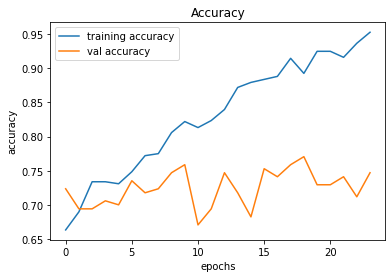

In [ ]:
# Plotting graph for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

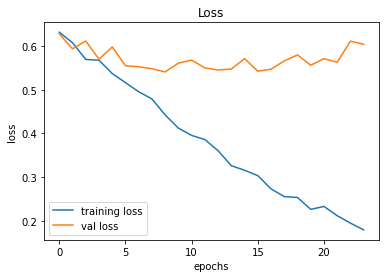

In [ ]:
# Plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(X_test)
X_preds = []
Y_preds = []
for i in range(20):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(y_test[i])
    Y_preds.append(y)
print(X_preds)
print(Y_preds)

[0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data;', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 170 
accurately-predicted-data: 127 
wrongly-predicted-data:  43
Accuracy: 74.706 %


## MODEL B

In [ ]:
# Building the Model
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(HEIGHT, WIDTH, CHANNEL)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 25, 25, 64)      

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9)
loss = keras.losses.BinaryCrossentropy(from_logits=True)

# Compiling the model
model.compile(
    loss=loss, 
    optimizer=opt, 
    metrics=['accuracy'])

In [ ]:
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 15)
checkpoint = ModelCheckpoint('my_model-SGD.h5', 
                             verbose=1, 
                             save_best_only=True)


history = model.fit(X_train, y_train, batch_size=50, epochs=100, validation_data=(X_test, y_test), 
                    callbacks=[checkpoint, monitor_val_acc])
#model.save('my_model-SGD.h5')

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


13/14 [==========================>...] - ETA: 0s - loss: 0.6785 - accuracy: 0.6538
Epoch 1: val_loss improved from inf to 0.67641, saving model to my_model-SGD.h5
14/14 [==============================] - 2s 66ms/step - loss: 0.6785 - accuracy: 0.6500 - val_loss: 0.6764 - val_accuracy: 0.6353
Epoch 2/100
13/14 [==========================>...] - ETA: 0s - loss: 0.6705 - accuracy: 0.6508
Epoch 2: val_loss improved from 0.67641 to 0.66601, saving model to my_model-SGD.h5
14/14 [==============================] - 1s 56ms/step - loss: 0.6703 - accuracy: 0.6500 - val_loss: 0.6660 - val_accuracy: 0.6353
Epoch 3/100
13/14 [==========================>...] - ETA: 0s - loss: 0.6599 - accuracy: 0.6508
Epoch 3: val_loss improved from 0.66601 to 0.65647, saving model to my_model-SGD.h5
14/14 [==============================] - 1s 54ms/step - loss: 0.6597 - accuracy: 0.6500 - val_loss: 0.6565 - val_accuracy: 0.6353
Epoch 4/100
13/14 [==========================>...] - ETA: 0s - loss: 0.6516 - accuracy: 0

In [ ]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 15ms/step - loss: 0.5845 - accuracy: 0.7000


[0.5844918489456177, 0.699999988079071]

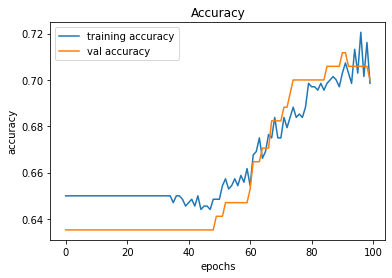

In [ ]:
# Plotting graph for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

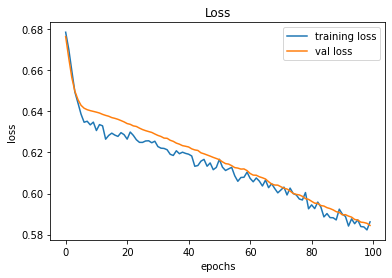

In [ ]:
# Plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(X_test)
X_preds = []
Y_preds = []
for i in range(30):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(y_test[i])
    Y_preds.append(y)
print('X_preds:', X_preds)
print('Y_preds:', Y_preds)

X_preds: [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
Y_preds: [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data;', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 170 
accurately-predicted-data: 119 
wrongly-predicted-data:  51
Accuracy: 70.0 %


# PRE-TRAINED MODELS

## Model D - DENSENET121

In [ ]:
model_d = DenseNet121(weights='imagenet', include_top=False, input_shape=(WIDTH, HEIGHT, CHANNEL)) 
x = model_d.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x) 
x = Dense(512, activation='relu')(x) 
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
preds=Dense(2, activation='softmax')(x)

29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
model = Model(inputs=model_d.input, outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 206, 206, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 100, 100, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
redlr = ReduceLROnPlateau(monitor='val_accuracy', 
                          factor=0.5,
                          patience=5, 
                          verbose=1, 
                          min_lr=1e-2)

checkpoint = ModelCheckpoint('densenet-model.h5', 
                             verbose=1, 
                             save_best_only=True)
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 15)

In [ ]:
opt = Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.999, epsilon=1e-08)
loss = keras.losses.BinaryCrossentropy(from_logits=True)

# Compiling the model
model.compile(
    loss=loss, 
    optimizer=opt, 
    metrics=['accuracy'])

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range = 0.2, 
                             horizontal_flip=True, 
                             shear_range=0.2,
                             vertical_flip=True,
                             rotation_range=10,
                             fill_mode="nearest")
datagen.fit(X_train)
# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=50), 
                    epochs=100, 
                    callbacks=[redlr, checkpoint, monitor_val_acc], 
                    validation_data=(X_test, y_test))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - ETA: 0s - loss: 0.9345 - accuracy: 0.5779
Epoch 1: val_loss improved from inf to 0.79789, saving model to densenet-model.h5
14/14 [==============================] - 19s 837ms/step - loss: 0.9345 - accuracy: 0.5779 - val_loss: 0.7979 - val_accuracy: 0.4412 - lr: 1.0000e-04
Epoch 2/100
14/14 [==============================] - ETA: 0s - loss: 0.7924 - accuracy: 0.6515
Epoch 2: val_loss did not improve from 0.79789
14/14 [==============================] - 6s 389ms/step - loss: 0.7924 - accuracy: 0.6515 - val_loss: 0.8027 - val_accuracy: 0.4353 - lr: 1.0000e-04
Epoch 3/100
14/14 [==============================] - ETA: 0s - loss: 0.7683 - accuracy: 0.6853
Epoch 3: val_loss improved from 0.79789 to 0.72573, saving model to densenet-model.h5
14/14 [==============================] - 6s 437ms/step - loss: 0.7683 - accuracy: 0.6853 - val_loss: 0.7257 - val_accuracy: 0.5118 - lr: 1.0000e-04
Epoch 4/100
14/14 [==============================] - ETA: 0s - loss

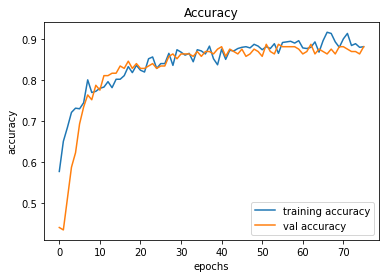

In [ ]:
# Plotting graph for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

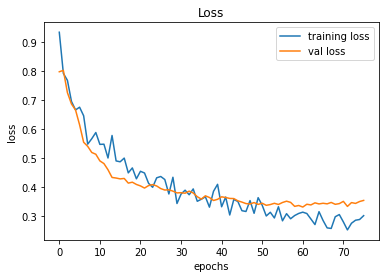

In [ ]:
# Plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model = tf.keras.models.load_model('densenet-model.h5')
pred = model.predict(X_test)
X_preds = []
Y_preds = []
for i in range(30):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(y_test[i])
    Y_preds.append(y)
print(X_preds)
print(Y_preds)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data;', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 170 
accurately-predicted-data: 147 
wrongly-predicted-data:  23
Accuracy: 86.471 %


## RESNET50

In [ ]:
model_d = ResNet50(weights='imagenet', include_top=False, input_shape=(WIDTH, HEIGHT, CHANNEL)) 
x = model_d.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x) 
x = Dense(512, activation='relu')(x) 
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
preds=Dense(2, activation='softmax')(x)

94781440/94765736 [==============================] - 2s 0us/step


In [ ]:
model = Model(inputs=model_d.input, outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [ ]:
redlr = ReduceLROnPlateau(monitor='val_accuracy', 
                          factor=0.5,
                          patience=5, 
                          verbose=1, 
                          min_lr=1e-2)

checkpoint = ModelCheckpoint('resnet50-model.h5', 
                             verbose=1, 
                             save_best_only=True)
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 15)

In [ ]:
opt = Adam(learning_rate=0.0001, beta_1=0.5, beta_2=0.999, epsilon=1e-08)
loss = keras.losses.BinaryCrossentropy(from_logits=True)

# Compiling the model
model.compile(
    loss=loss, 
    optimizer=opt, 
    metrics=['accuracy'])

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(zoom_range = 0.2, 
                             horizontal_flip=True, 
                             shear_range=0.2,
                             vertical_flip=True,
                             rotation_range=10,
                             fill_mode="nearest")
datagen.fit(X_train)
# Training the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=50), 
                    epochs=100, 
                    callbacks=[redlr, checkpoint, monitor_val_acc], 
                    validation_data=(X_test, y_test))

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - ETA: 0s - loss: 0.9154 - accuracy: 0.5765
Epoch 1: val_loss improved from inf to 0.73258, saving model to resnet50-model.h5
14/14 [==============================] - 19s 477ms/step - loss: 0.9154 - accuracy: 0.5765 - val_loss: 0.7326 - val_accuracy: 0.3706 - lr: 1.0000e-04
Epoch 2/100
14/14 [==============================] - ETA: 0s - loss: 0.8685 - accuracy: 0.6221
Epoch 2: val_loss did not improve from 0.73258
14/14 [==============================] - 5s 366ms/step - loss: 0.8685 - accuracy: 0.6221 - val_loss: 0.7353 - val_accuracy: 0.3706 - lr: 1.0000e-04
Epoch 3/100
14/14 [==============================] - ETA: 0s - loss: 0.8539 - accuracy: 0.6426
Epoch 3: val_loss did not improve from 0.73258
14/14 [==============================] - 5s 365ms/step - loss: 0.8539 - accuracy: 0.6426 - val_loss: 0.7389 - val_accuracy: 0.3706 - lr: 1.0000e-04
Epoch 4/100
14/14 [==============================] - ETA: 0s - loss: 0.8189 - accuracy: 0.6515
Epoch 4: va

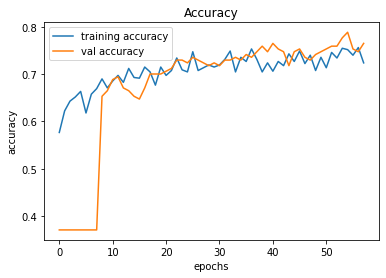

In [ ]:
# Plotting graph for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

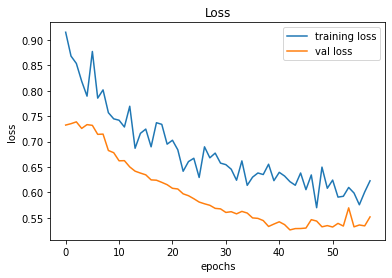

In [ ]:
# Plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
pred = model.predict(X_test)
X_preds = []
Y_preds = []
for i in range(30):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(y_test[i])
    Y_preds.append(y)
print(X_preds)
print(Y_preds)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(y_test[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data;', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data; 170 
accurately-predicted-data: 130 
wrongly-predicted-data:  40
Accuracy: 76.471 %


## Test the models with test dataset

In [ ]:
test_path = os.path.join('/content/drive/My Drive/ARU/testDataset')

In [ ]:
train_neg_images = os.listdir(test_path + '/Negative/');
train_post_images = os.listdir(test_path + '/Positive/');

In [ ]:
neg_images = {'filename': train_neg_images}
neg_images = pd.DataFrame(neg_images)
neg_filename = neg_images['filename']

post_images = {'filename': train_post_images}
post_images = pd.DataFrame(post_images)
post_filename = post_images['filename']

In [ ]:
NUM_NEG_IMAGES = len(neg_images)
print(NUM_NEG_IMAGES)

50


In [ ]:
NUM_POST_IMAGES = len(post_images)
print(NUM_POST_IMAGES)

50


In [ ]:
# Building data list
test_negative = []
neg_label = []
for i in range(NUM_NEG_IMAGES):
    image = Image.open(test_path + '/Negative/' + neg_filename[i])
    # resize the image and convert into numpy array (224, 224)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    test_negative.append(image)
    neg_label.append(0)

In [ ]:
# Building data list
test_positive = []
post_label = []
for i in range(NUM_POST_IMAGES):
    image = Image.open(test_path + '/Positive/' + post_filename[i])
    # resize the image and convert into numpy array (224, 224)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    test_positive.append(image)
    post_label.append(1)

In [ ]:
test_X = np.array(test_negative + test_positive)
test_X = test_X / 255

In [ ]:
len(test_X)

100

In [ ]:
test_y = np.array(neg_label + post_label)

In [ ]:
RANGE = len(test_X)
RANGE

100

In [ ]:
test_y = keras.utils.to_categorical(test_y)

## Model A

In [ ]:
model = tf.keras.models.load_model('my_model.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 57 
wrongly-predicted-data:  43
Accuracy: 57.0 %


tf.Tensor(
[[42  8]
 [35 15]], shape=(2, 2), dtype=int32)


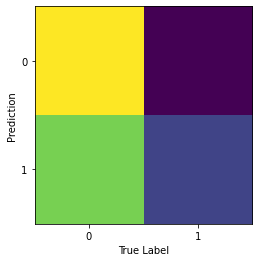

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model B

In [ ]:
model = tf.keras.models.load_model('my_model-SGD.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 55 
wrongly-predicted-data:  45
Accuracy: 55.0 %


tf.Tensor(
[[43  7]
 [38 12]], shape=(2, 2), dtype=int32)


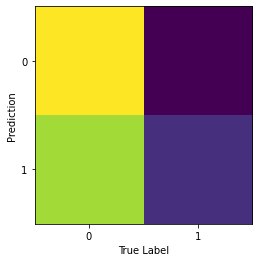

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model D - DENSENET

In [ ]:
model = tf.keras.models.load_model('densenet-model.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 81 
wrongly-predicted-data:  19
Accuracy: 81.0 %


tf.Tensor(
[[41  9]
 [10 40]], shape=(2, 2), dtype=int32)


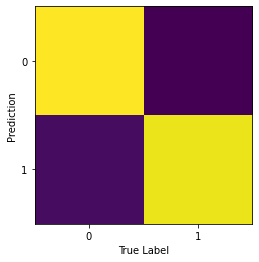

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model E

In [ ]:
model = tf.keras.models.load_model('resnet50-model.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 56 
wrongly-predicted-data:  44
Accuracy: 56.0 %


tf.Tensor(
[[38 12]
 [32 18]], shape=(2, 2), dtype=int32)


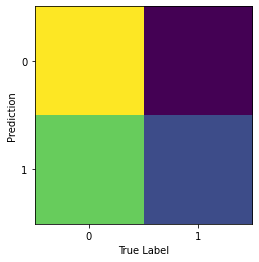

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

# Test the models with fake image dataset

In [ ]:
train_neg_images = os.listdir(test_path + '/Negative-GAN/');
train_post_images = os.listdir(test_path + '/Positive-GAN/');

In [ ]:
neg_images = {'filename': train_neg_images}
neg_images = pd.DataFrame(neg_images)
neg_filename = neg_images['filename']

post_images = {'filename': train_post_images}
post_images = pd.DataFrame(post_images)
post_filename = post_images['filename']

In [ ]:
NUM_NEG_IMAGES = len(neg_images)
print(NUM_NEG_IMAGES)

50


In [ ]:
NUM_POST_IMAGES = len(post_images)
print(NUM_POST_IMAGES)

50


In [ ]:
# Building data list
test_negative = []
neg_label = []
for i in range(NUM_NEG_IMAGES):
    image = Image.open(test_path + '/Negative-GAN/' + neg_filename[i])
    # resize the image and convert into numpy array (224, 224)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    test_negative.append(image)
    neg_label.append(0)

In [ ]:
# Building data list
test_positive = []
post_label = []
for i in range(NUM_POST_IMAGES):
    image = Image.open(test_path + '/Positive-GAN/' + post_filename[i])
    # resize the image and convert into numpy array (224, 224)
    image = np.array(image.resize((WIDTH, HEIGHT)))
    test_positive.append(image)
    post_label.append(1)

In [ ]:
test_X = np.array(test_negative + test_positive)
test_X = test_X / 255
print(len(test_X))

test_y = np.array(neg_label + post_label)

RANGE = len(test_X)
print(RANGE)

test_y = keras.utils.to_categorical(test_y)

100
100


## Model A

In [ ]:
model = tf.keras.models.load_model('my_model.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 76 
wrongly-predicted-data:  24
Accuracy: 76.0 %


tf.Tensor(
[[39 11]
 [13 37]], shape=(2, 2), dtype=int32)


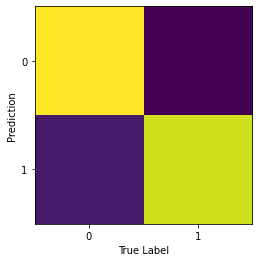

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model B

In [ ]:
model = tf.keras.models.load_model('my_model-SGD.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 61 
wrongly-predicted-data:  39
Accuracy: 61.0 %


tf.Tensor(
[[46  4]
 [35 15]], shape=(2, 2), dtype=int32)


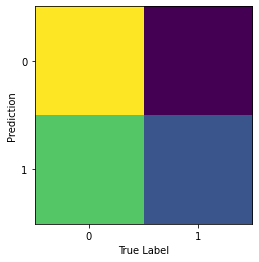

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()

## Model D - DENSENET

In [ ]:
model = tf.keras.models.load_model('densenet-model.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 74 
wrongly-predicted-data:  26
Accuracy: 74.0 %


## Model E

In [ ]:
model = tf.keras.models.load_model('resnet50-model.h5')

pred = model.predict(test_X)
X_preds = []
Y_preds = []

for i in range(RANGE):
    score = tf.nn.softmax(pred[i])
    score = np.argmax(score)
    X_preds.append(score)
    y = np.argmax(test_y[i])
    Y_preds.append(y)

print(X_preds)
print(Y_preds)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
total = 0
accurate = 0
accurateindex = []
wrongindex = []

for i in range(len(pred)):
    if np.argmax(pred[i]) == np.argmax(test_y[i]):
        accurate += 1
        accurateindex.append(i)
    else:
        wrongindex.append(i)     
    total += 1
    
print('Total-test-data:', total, '\naccurately-predicted-data:', accurate, '\nwrongly-predicted-data: ', total - accurate)
print('Accuracy:', round(accurate/total*100, 3), '%')

Total-test-data: 100 
accurately-predicted-data: 64 
wrongly-predicted-data:  36
Accuracy: 64.0 %


tf.Tensor(
[[42  8]
 [28 22]], shape=(2, 2), dtype=int32)


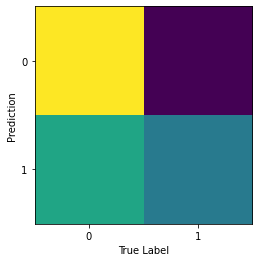

In [ ]:
c_matrix = tf.math.confusion_matrix(Y_preds, X_preds, num_classes=2)
print(c_matrix)
plt.imshow(c_matrix)
plt.xlabel('True Label')
plt.xticks(np.arange(2), [x for x in range(0, 2)])
plt.ylabel('Prediction')
plt.yticks(np.arange(2), [x for x in range(0, 2)])
plt.savefig('MC_OPT_L1L2_CM_final.pdf')
plt.show()